# Section 6: Object Detection with OpenCV and Python

Topics covered:
- Introduction to Object Detection
- Template Matching
- Corner Detection - Part One - Harris Corner Detection
- Corner Detection - Part Two - Shi-Tomasi Detection
- Edge Detection
- Grid Detection
- Contour Detection
- Feature Matching - Part One
- Feature Matching - Part Two
- Watershed Algorithm - Part One
- Watershed Algorithm - Part Two
- Custom Seeds with Watershed Algorithm
- Introduction to Face Detection
- Face Detection with OpenCV
- Detection Assessment
- Detection Assessment Solutions

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
full = cv2.imread("../data/sammy.jpg")
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

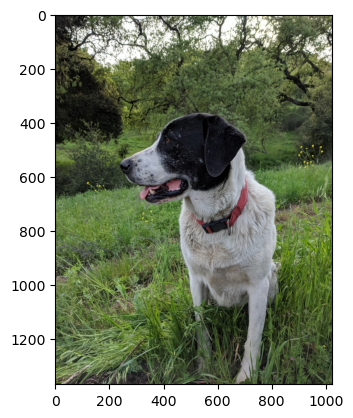

In [8]:
plt.imshow(full)

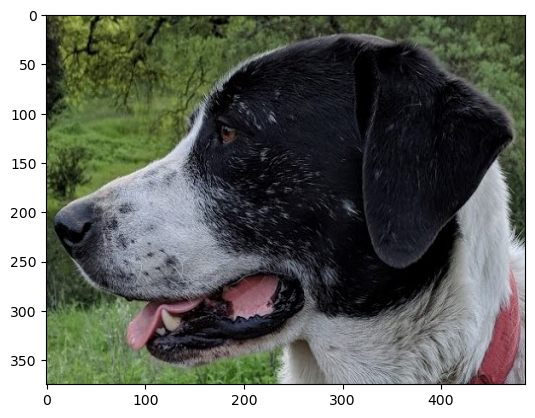

In [9]:
face = cv2.imread("../data/sammy_face.jpg")
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
plt.imshow(face)

In [10]:
face.shape

(375, 486, 3)

In [11]:
sum([1,2,3])

6

In [13]:
mystring = 'sum'

In [14]:
eval(mystring)

<function sum(iterable, /, start=0)>

In [15]:
myfunc = eval(mystring)

In [16]:
myfunc([1,2,3])

6

In [17]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

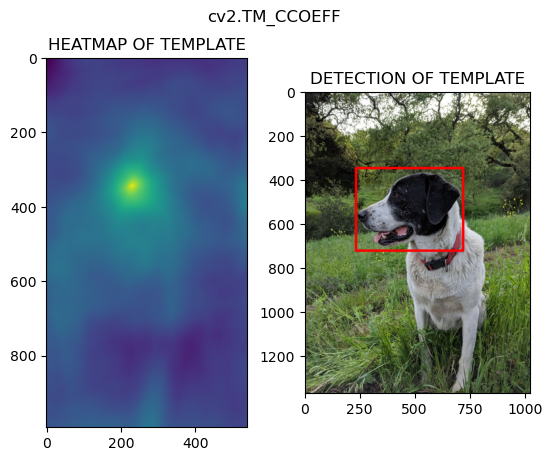

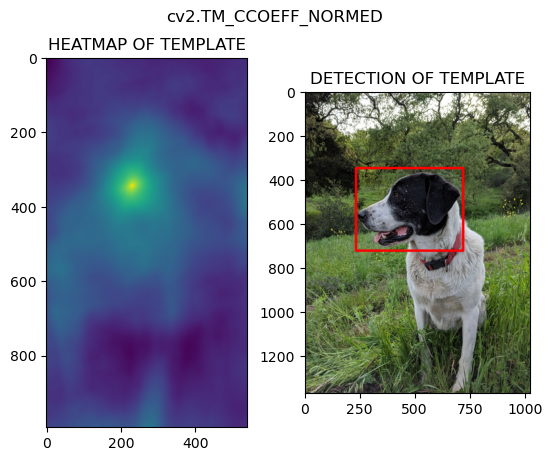

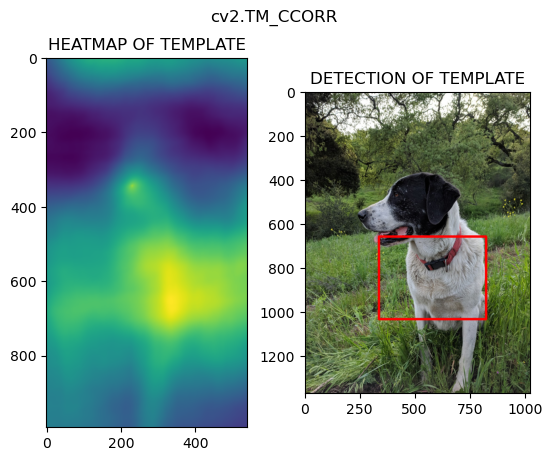

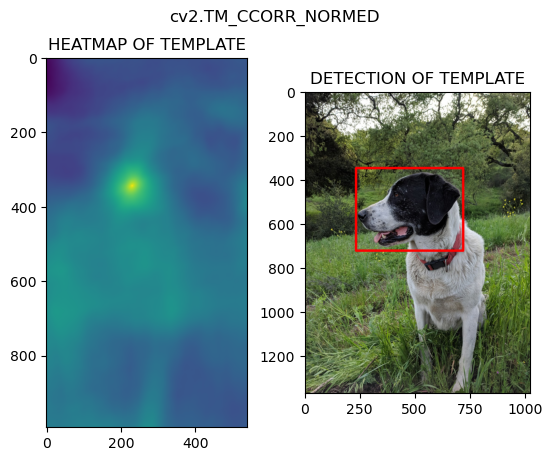

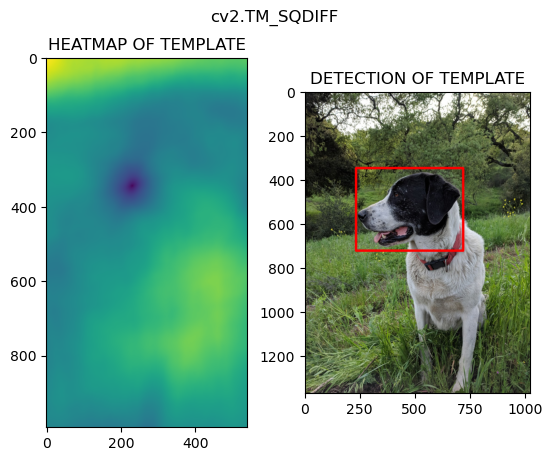

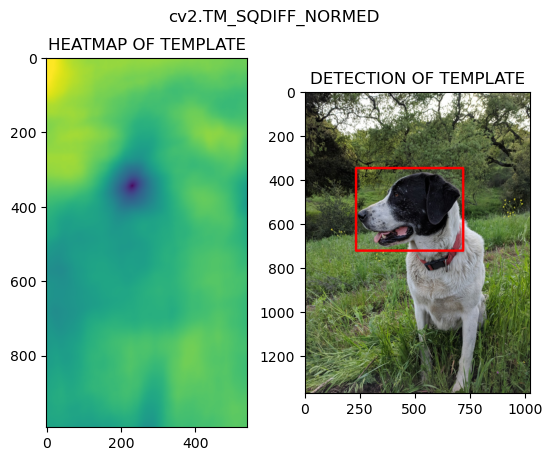

In [37]:
for m in methods:
    full_copy = full.copy()
    method = eval(m)
    
    res = cv2.matchTemplate(full_copy, face, method)

    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    height, width, channels = face.shape

    bottom_right = (top_left[0]+width, top_left[1]+height)

    cv2.rectangle(full_copy, top_left, bottom_right, (255,0,0), 10)

    # PLOT AND SHOW THE IMAGES
    plt.subplot(121)
    plt.imshow(res)
    plt.title('HEATMAP OF TEMPLATE')

    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('DETECTION OF TEMPLATE')

    plt.suptitle(m)
    plt.show()
    
    print('\n')
    print('\n')

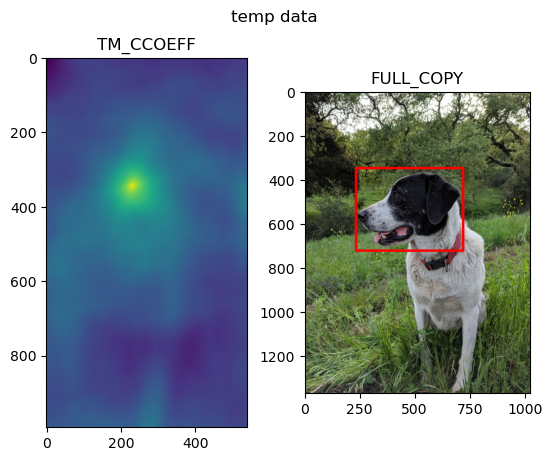

In [43]:
my_method = eval('cv2.TM_CCOEFF')
res = cv2.matchTemplate(full, face, my_method)

plt.subplot(121)
plt.imshow(res)
plt.title('TM_CCOEFF')

plt.subplot(122)
plt.imshow(full_copy)
plt.title('FULL_COPY')
plt.suptitle("temp data")
plt.show()

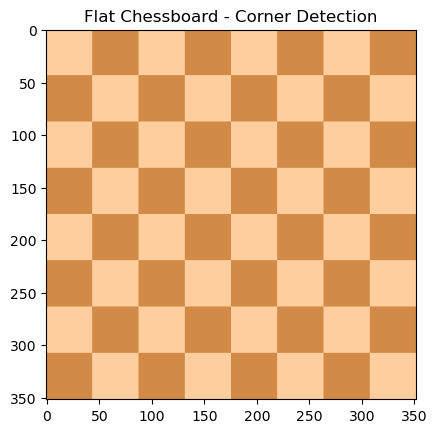

In [66]:
flat_chessboard = cv2.imread("../data/flat_chessboard.png")
flat_chessboard = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
plt.title('Flat Chessboard - Corner Detection')
plt.imshow(face)

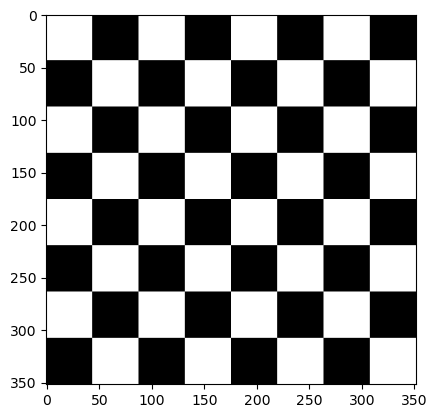

In [71]:
grey_flat_chess = cv2.cvtColor(flat_chessboard, cv2.COLOR_BGR2GRAY)
plt.imshow(grey_flat_chess, cmap='gray')


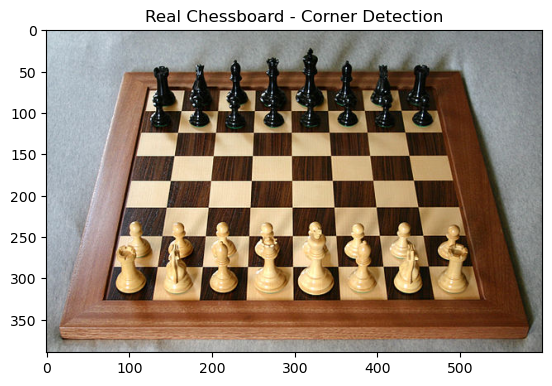

In [77]:
real_chessboard = cv2.imread("../data/real_chessboard.jpg")
real_chessboard = cv2.cvtColor(real_chessboard, cv2.COLOR_BGR2RGB)
plt.title('Real Chessboard - Corner Detection')
plt.imshow(real_chessboard)

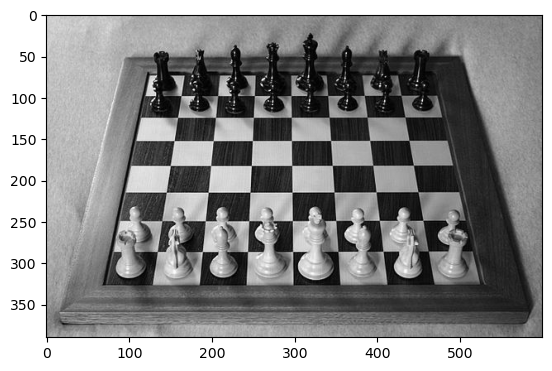

In [80]:
gray_real_chessboard = cv2.cvtColor(real_chessboard, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_real_chessboard, cmap='gray')

In [82]:
gray = np.float32(grey_flat_chess)
gray

array([[215., 215., 215., ..., 152., 152., 152.],
       [215., 215., 215., ..., 152., 152., 152.],
       [215., 215., 215., ..., 152., 152., 152.],
       ...,
       [152., 152., 152., ..., 215., 215., 215.],
       [152., 152., 152., ..., 215., 215., 215.],
       [152., 152., 152., ..., 215., 215., 215.]], dtype=float32)

In [83]:
dst = cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)

In [84]:
dst = cv2.dilate(dst, None)

In [85]:
dst

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [86]:
flat_chessboard[dst>0.01*dst.max()] = (255,0,0)

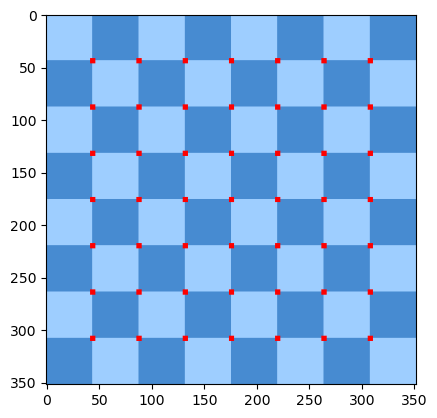

In [88]:
plt.imshow(flat_chessboard, cmap='gray')

In [89]:
gray = np.float32(gray_real_chessboard)
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

In [90]:
dst = cv2.dilate(dst, None)

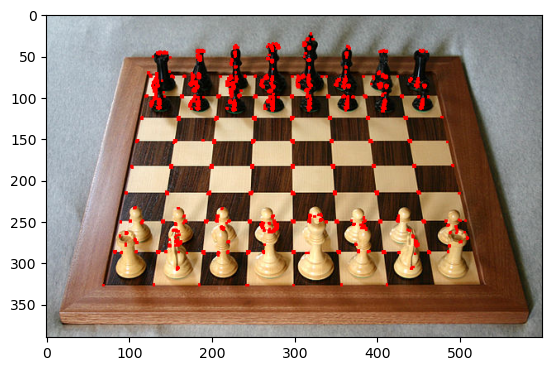

In [91]:
real_chessboard[dst>0.01*dst.max()] = (255,0,0)
plt.imshow(real_chessboard)

In [115]:
flat_chessboard = cv2.imread("../data/flat_chessboard.png")
flat_chessboard = cv2.cvtColor(flat_chessboard, cv2.COLOR_BGR2RGB)

real_chessboard = cv2.imread("../data/real_chessboard.jpg")
real_chessboard = cv2.cvtColor(real_chessboard, cv2.COLOR_BGR2RGB)

gray_flat_chessboard = cv2.cvtColor(flat_chessboard, cv2.COLOR_BGR2GRAY)
gray_real_chessboard = cv2.cvtColor(real_chessboard, cv2.COLOR_BGR2GRAY)

In [116]:
corners = cv2.goodFeaturesToTrack(gray_flat_chessboard, 50, 0.01, 10)

In [117]:
corners = np.int0(corners)
corners

/var/folders/nf/vchzzzc50ps42vqwl1lxqdvh0000gn/T/ipykernel_40385/1143071229.py:1: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


array([[[308, 308]],

       [[264, 308]],

       [[220, 308]],

       [[176, 308]],

       [[132, 308]],

       [[ 88, 308]],

       [[ 44, 308]],

       [[308, 264]],

       [[264, 264]],

       [[220, 264]],

       [[176, 264]],

       [[132, 264]],

       [[ 88, 264]],

       [[ 44, 264]],

       [[308, 220]],

       [[264, 220]],

       [[220, 220]],

       [[176, 220]],

       [[132, 220]],

       [[ 88, 220]],

       [[ 44, 220]],

       [[308, 176]],

       [[264, 176]],

       [[220, 176]],

       [[176, 176]],

       [[132, 176]],

       [[ 88, 176]],

       [[ 44, 176]],

       [[308, 132]],

       [[264, 132]],

       [[220, 132]],

       [[176, 132]],

       [[132, 132]],

       [[ 88, 132]],

       [[ 44, 132]],

       [[308,  88]],

       [[264,  88]],

       [[220,  88]],

       [[176,  88]],

       [[132,  88]],

       [[ 88,  88]],

       [[ 44,  88]],

       [[308,  44]],

       [[264,  44]],

       [[220,  44]],

       [[1

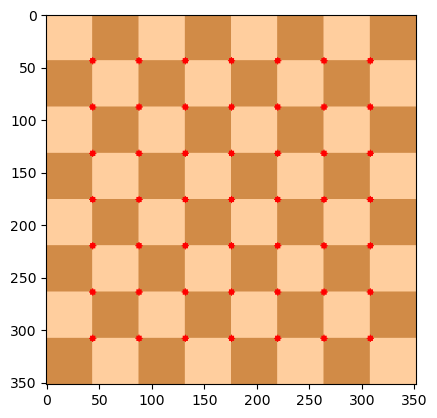

In [118]:
for i in corners:
    x, y = i.ravel()
    cv2.circle(flat_chessboard, (x,y), 3, (255,0,0), -1)
plt.imshow(flat_chessboard)

In [123]:
corners = cv2.goodFeaturesToTrack(gray_real_chessboard, 800, 0.01, 10)
corners = np.int0(corners)

/var/folders/nf/vchzzzc50ps42vqwl1lxqdvh0000gn/T/ipykernel_40385/3557450000.py:2: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


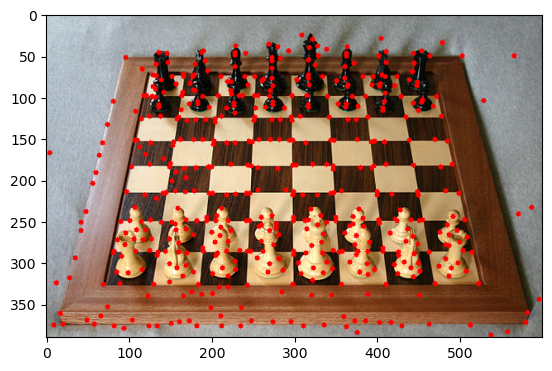

In [124]:
for i in corners:
    x,y = i.ravel()
    cv2.circle(real_chessboard, (x,y), 3, (255,0,0), -1)
plt.imshow(real_chessboard)